In [683]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [684]:
df = pd.read_csv("/Users/aimaldastagirzada/Downloads/kc_house_data.csv")

In [685]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [686]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [687]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [688]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<Axes: xlabel='price', ylabel='sqft_living'>

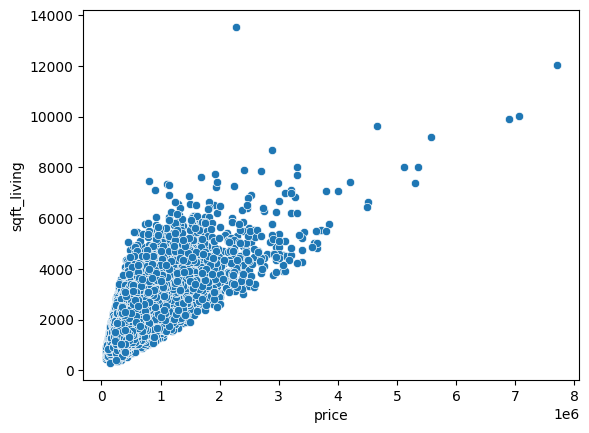

In [689]:
sns.scatterplot(x='price', y='sqft_living',data=df)

<Axes: ylabel='price'>

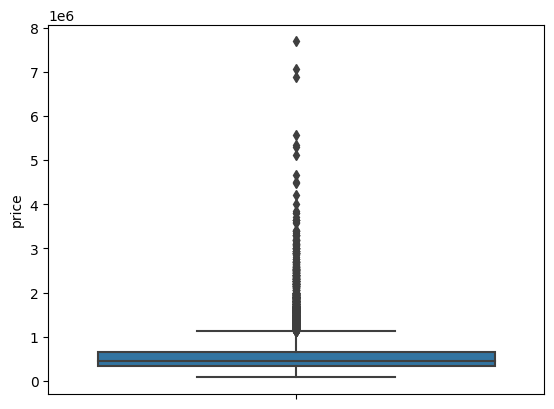

In [690]:
sns.boxplot(data = df, y='price')

In [691]:
p_i =df[df['price']>1000].index

<Axes: xlabel='price', ylabel='Count'>

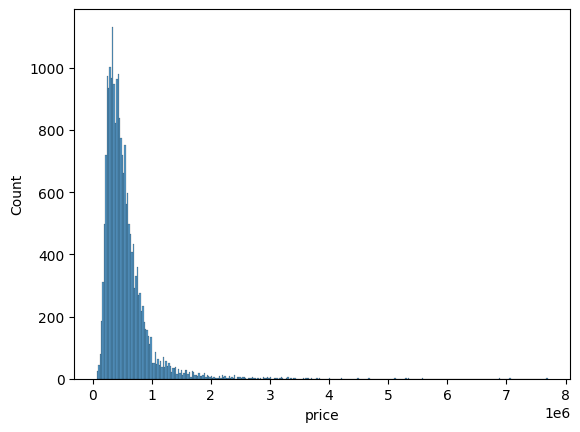

In [692]:
sns.histplot(df['price'])

<Axes: ylabel='grade'>

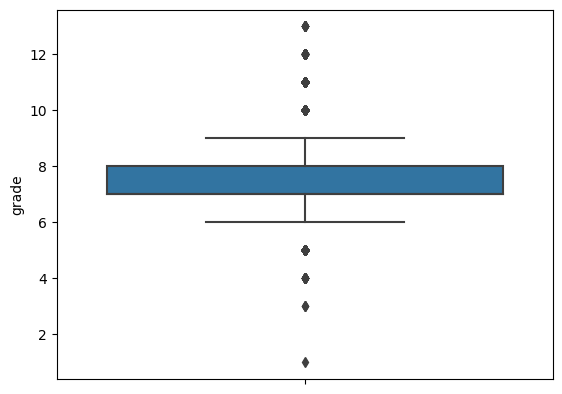

In [693]:
sns.boxplot(data = df, y='grade')

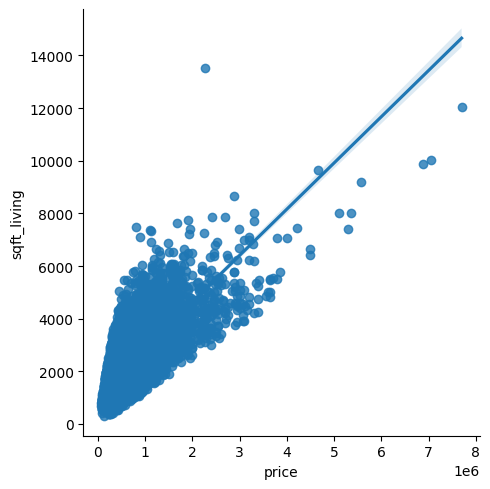

In [694]:
sns.lmplot(x='price',y= 'sqft_living',data=df)

In [695]:
df[df['price'] == df['price'].min()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


In [696]:
df[df['price'] == df['price'].max()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


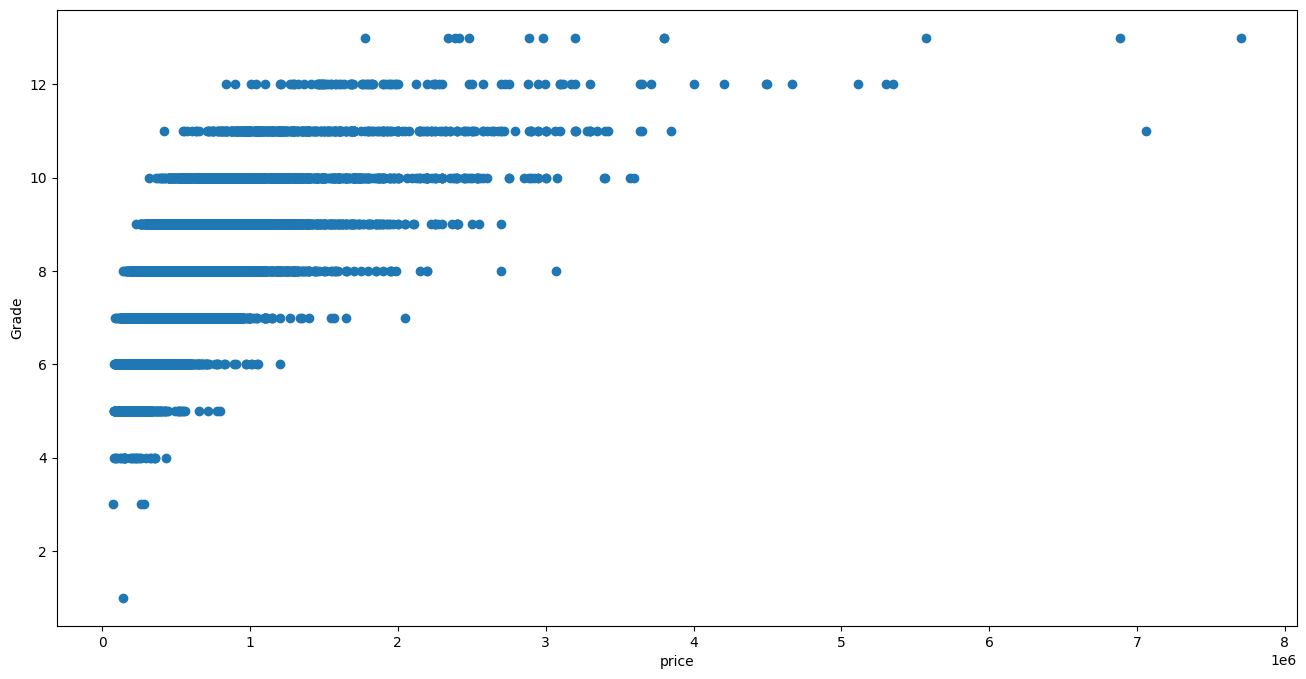

In [697]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['price'], df['grade'])
ax.set_xlabel('price')
ax.set_ylabel('Grade')
plt.show()

In [698]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [699]:
results = ols("price ~ bedrooms + floors + sqft_living", data= df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     7402.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:49:03   Log-Likelihood:            -2.9997e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21609   BIC:                         6.000e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    7.586e+04   7658.046      9.905      

In [700]:
"y_hat = 7.586e+04 -5.699e+04bedrooms - 3239.7578floor+ 313.2273sqft_living"

'y_hat = 7.586e+04 -5.699e+04bedrooms - 3239.7578floor+ 313.2273sqft_living'

In [701]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [702]:
7.586e+04 -5.699e+04*(3) +3239.7578*(1)+ 313.2273*(1180)

277737.97180000006

In [703]:
pred_vals = results.predict(df[['bedrooms','floors','sqft_living']])

In [704]:
pred_vals

0        277746.303147
1        716371.985462
2        206309.041619
3        465077.659686
4        434359.945054
             ...      
21608    393855.368107
21609    577946.966834
21610    287855.620385
21611    412541.520162
21612    287855.620385
Length: 21613, dtype: float64

In [705]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [706]:
res

,y_hat,price
0,277746.303147,221900.0
1,716371.985462,538000.0
2,206309.041619,180000.0
3,465077.659686,604000.0
4,434359.945054,510000.0
...,...,...
21608,393855.368107,360000.0
21609,577946.966834,400000.0
21610,287855.620385,402101.0
21611,412541.520162,400000.0


In [707]:
res['error'] = res['y_hat'] - res['price']

In [708]:
res.head(1)

,y_hat,price,error
0,277746.303147,221900.0,55846.303147


In [709]:
res['sq_error'] = res['error']**2

In [710]:
np.sqrt(res['sq_error'].mean())

257814.81242133427

In [711]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


(array([3.0000e+00, 2.0000e+00, 4.0000e+00, 2.5000e+01, 6.1000e+01,
        3.1200e+02, 5.0320e+03, 1.5943e+04, 2.2800e+02, 3.0000e+00]),
 array([-4183571.25957335, -3600436.9988779 , -3017302.73818245,
        -2434168.477487  , -1851034.21679155, -1267899.95609611,
         -684765.69540066,  -101631.43470521,   481502.82599024,
         1064637.08668569,  1647771.34738114]),
 <BarContainer object of 10 artists>)

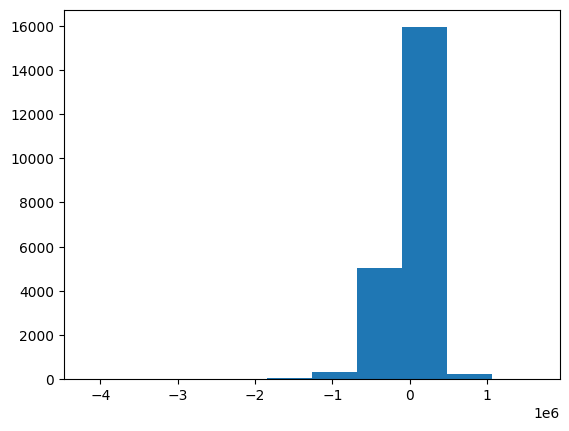

In [712]:
plt.hist(res['error'])

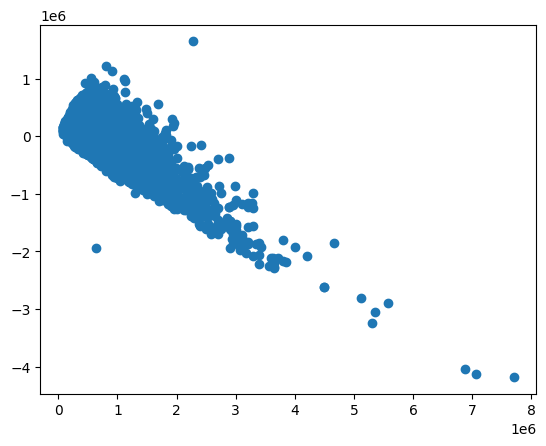

In [713]:
plt.scatter(df['price'],res['error'])

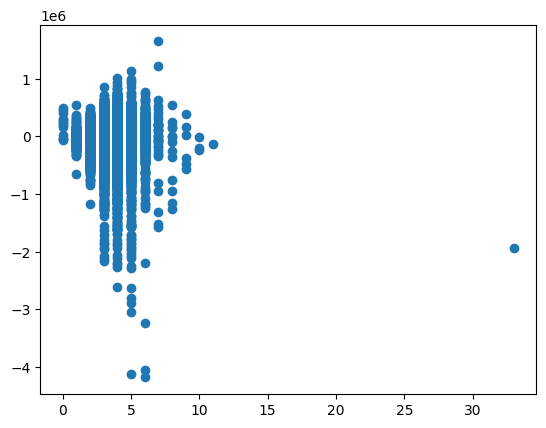

In [714]:
plt.scatter(df['bedrooms'],res['error'])

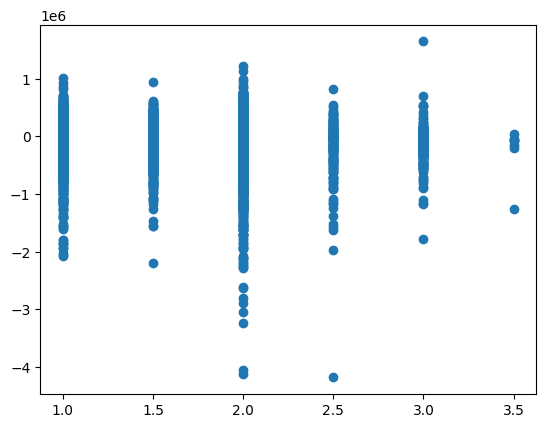

In [715]:
plt.scatter(df['floors'],res['error'])

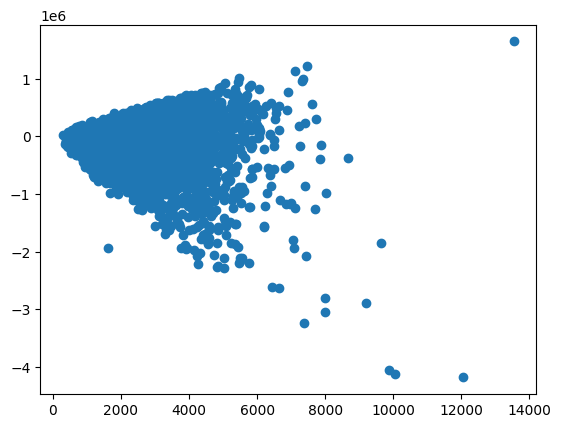

In [716]:
plt.scatter(df['sqft_living'],res['error'])

((array([-3.99703558, -3.78181236, -3.66408326, ...,  3.66408326,
          3.78181236,  3.99703558]),
  array([-4183571.25957335, -4120292.05411166, -4046762.07152014, ...,
          1127584.27714835,  1226374.24964934,  1647771.34738114])),
 (236048.03439392045, 2.6861163062362583e-08, 0.9154090672465339))

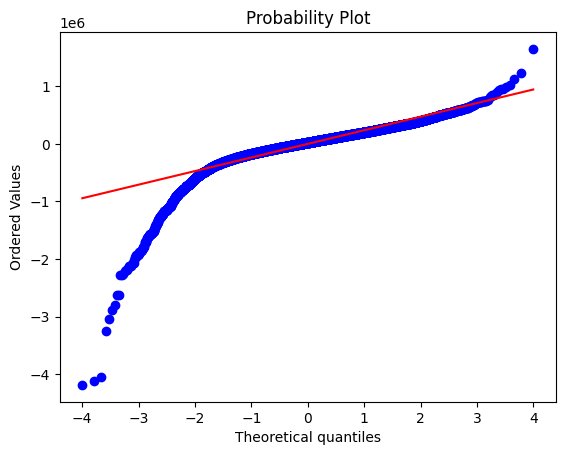

In [717]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [718]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.001339     -0.000266    0.000885         0.001006  1.282241e-06  \
1          -0.000592      0.003931   -0.003612        -0.003041  1.451578e-05   
2          -0.001197      0.000565    0.000326         0.000362  4.686854e-07   
3           0.000557      0.003247   -0.003282        -0.001186  8.953309e-06   
4           0.001972     -0.000422   -0.001639         0.000039  1.888653e-06   
...              ...           ...         ...              ...           ...   
21608       0.000931     -0.000049   -0.002867         0.001284  2.326437e-06   
21609       0.003736     -0.003219   -0.004374         0.002136  1.297609e-05   
21610       0.002295     -0.002822    0.004226        -0.002393  1.198833e-05   
21611       0.000009      0.000025   -0.000396         0.000237  7.435703e-08   
21612       0.000746     -0.000918    0.001374        -0.000778  1.267266e-06   

       standard_resid  hat_

In [719]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_floors,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001339,-0.000266,0.000885,0.001006,1.282241e-06,-0.216606,0.000109,-0.002265,-0.216601,-0.002265
1,-0.000592,0.003931,-0.003612,-0.003041,1.451578e-05,-0.691839,0.000121,-0.007620,-0.691830,-0.007620
2,-0.001197,0.000565,0.000326,0.000362,4.686854e-07,-0.102046,0.000180,-0.001369,-0.102044,-0.001369
3,0.000557,0.003247,-0.003282,-0.001186,8.953309e-06,0.538829,0.000123,0.005984,0.538820,0.005984
4,0.001972,-0.000422,-0.001639,0.000039,1.888653e-06,0.293375,0.000088,0.002749,0.293369,0.002749
...,...,...,...,...,...,...,...,...,...,...
21608,0.000931,-0.000049,-0.002867,0.001284,2.326437e-06,-0.131340,0.000539,-0.003051,-0.131337,-0.003050
21609,0.003736,-0.003219,-0.004374,0.002136,1.297609e-05,-0.690186,0.000109,-0.007204,-0.690178,-0.007204
21610,0.002295,-0.002822,0.004226,-0.002393,1.198833e-05,0.443143,0.000244,0.006925,0.443134,0.006925
21611,0.000009,0.000025,-0.000396,0.000237,7.435703e-08,-0.048644,0.000126,-0.000545,-0.048643,-0.000545


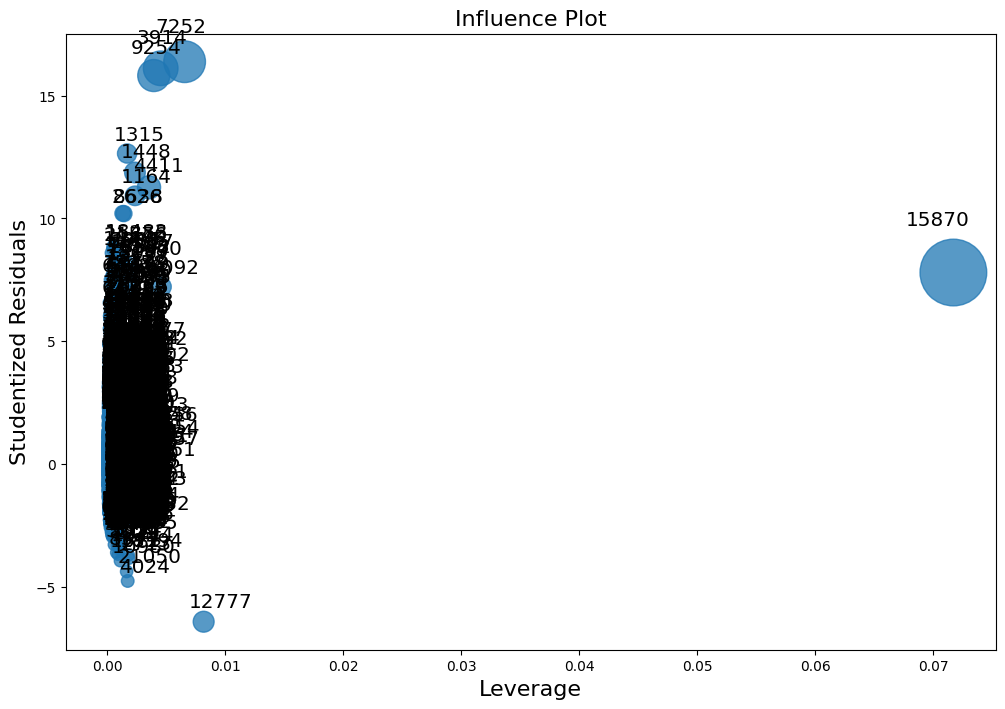

In [720]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [721]:
df.drop(15870, inplace= True)

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long       

In [724]:
results = ols("price ~ bedrooms + floors + sqft_living", data= df).fit()


In [725]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     7443.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:52:38   Log-Likelihood:            -2.9992e+05
No. Observations:               21612   AIC:                         5.999e+05
Df Residuals:                   21608   BIC:                         5.999e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.656e+04   7769.775     11.141      

In [726]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.001283     -0.000278    0.000872         0.000994  1.247940e-06  \
1          -0.000790      0.004157   -0.003675        -0.003233  1.538377e-05   
2          -0.001338      0.000649    0.000363         0.000373  5.856016e-07   
3           0.000391      0.003473   -0.003366        -0.001354  9.677872e-06   
4           0.001943     -0.000428   -0.001628         0.000052  1.864873e-06   
...              ...           ...         ...              ...           ...   
21608       0.000916     -0.000049   -0.002863         0.001268  2.320502e-06   
21609       0.003785     -0.003298   -0.004320         0.002219  1.282918e-05   
21610       0.002325     -0.002841    0.004098        -0.002179  1.143589e-05   
21611       0.000008      0.000026   -0.000404         0.000238  7.759068e-08   
21612       0.000706     -0.000863    0.001245        -0.000662  1.055099e-06   

       standard_resid  hat_

In [727]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_floors,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001283,-0.000278,0.000872,0.000994,1.247940e-06,-0.213503,0.000109,-0.002234,-0.213498,-0.002234
1,-0.000790,0.004157,-0.003675,-0.003233,1.538377e-05,-0.705063,0.000124,-0.007844,-0.705055,-0.007844
2,-0.001338,0.000649,0.000363,0.000373,5.856016e-07,-0.113415,0.000182,-0.001530,-0.113412,-0.001530
3,0.000391,0.003473,-0.003366,-0.001354,9.677872e-06,0.553299,0.000126,0.006222,0.553290,0.006222
4,0.001943,-0.000428,-0.001628,0.000052,1.864873e-06,0.291362,0.000088,0.002731,0.291356,0.002731
...,...,...,...,...,...,...,...,...,...,...
21608,0.000916,-0.000049,-0.002863,0.001268,2.320502e-06,-0.131172,0.000539,-0.003047,-0.131169,-0.003047
21609,0.003785,-0.003298,-0.004320,0.002219,1.282918e-05,-0.680980,0.000111,-0.007164,-0.680971,-0.007163
21610,0.002325,-0.002841,0.004098,-0.002179,1.143589e-05,0.430129,0.000247,0.006763,0.430120,0.006763
21611,0.000008,0.000026,-0.000404,0.000238,7.759068e-08,-0.049687,0.000126,-0.000557,-0.049686,-0.000557


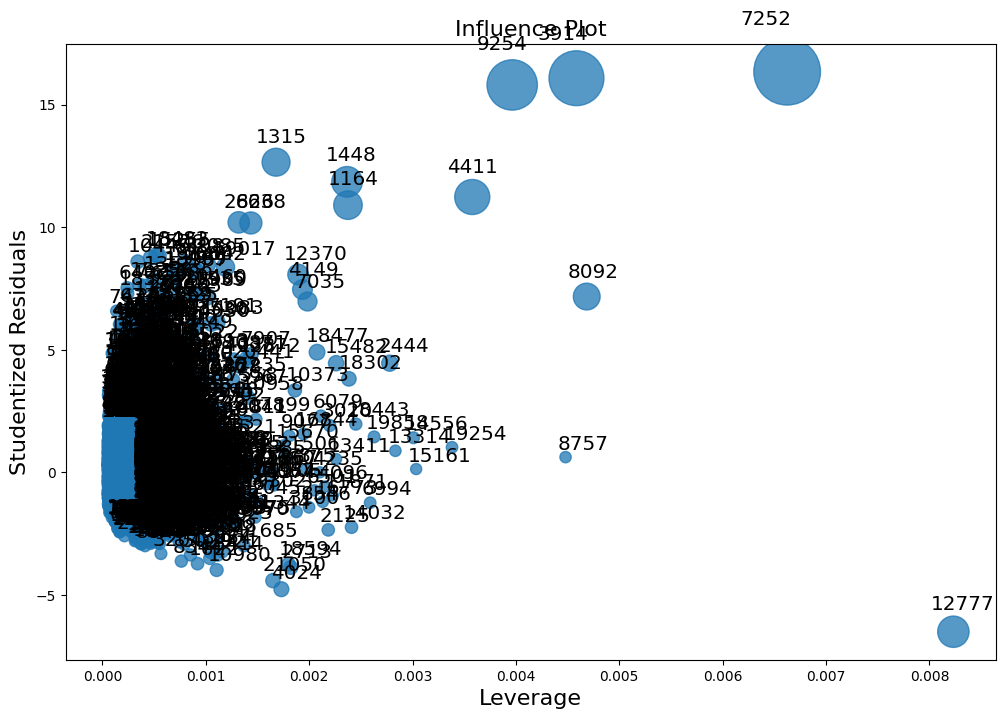

In [728]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [729]:
df_2 = df.copy()

In [730]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21612 non-null  int64  
 1   date           21612 non-null  object 
 2   price          21612 non-null  float64
 3   bedrooms       21612 non-null  int64  
 4   bathrooms      21612 non-null  float64
 5   sqft_living    21612 non-null  int64  
 6   sqft_lot       21612 non-null  int64  
 7   floors         21612 non-null  float64
 8   waterfront     21612 non-null  int64  
 9   view           21612 non-null  int64  
 10  condition      21612 non-null  int64  
 11  grade          21612 non-null  int64  
 12  sqft_above     21612 non-null  int64  
 13  sqft_basement  21612 non-null  int64  
 14  yr_built       21612 non-null  int64  
 15  yr_renovated   21612 non-null  int64  
 16  zipcode        21612 non-null  int64  
 17  lat            21612 non-null  float64
 18  long       

In [731]:
df_2.drop(7252, inplace=True)

In [733]:
results = ols("price ~ bedrooms + floors + sqft_living", data= df_2).fit()


In [734]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.506
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     7363.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:59:28   Log-Likelihood:            -2.9978e+05
No. Observations:               21611   AIC:                         5.996e+05
Df Residuals:                   21607   BIC:                         5.996e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    8.766e+04   7722.700     11.351      

In [735]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_bedrooms  dfb_floors  dfb_sqft_living       cooks_d   
0          -0.001333     -0.000292    0.000904         0.001037  1.348969e-06  \
1          -0.000785      0.004149   -0.003658        -0.003234  1.529750e-05   
2          -0.001435      0.000694    0.000388         0.000403  6.733841e-07   
3           0.000392      0.003483   -0.003373        -0.001358  9.729861e-06   
4           0.001950     -0.000429   -0.001633         0.000051  1.877702e-06   
...              ...           ...         ...              ...           ...   
21608       0.000987     -0.000055   -0.003089         0.001370  2.701458e-06   
21609       0.003813     -0.003323   -0.004353         0.002233  1.302693e-05   
21610       0.002299     -0.002799    0.004052        -0.002162  1.117464e-05   
21611       0.000009      0.000028   -0.000449         0.000265  9.585051e-08   
21612       0.000669     -0.000815    0.001179        -0.000629  9.463442e-07   

       standard_resid  hat_

In [736]:
infl.summary_frame()

,dfb_Intercept,dfb_bedrooms,dfb_floors,dfb_sqft_living,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.001333,-0.000292,0.000904,0.001037,1.348969e-06,-0.221792,0.000110,-0.002323,-0.221787,-0.002323
1,-0.000785,0.004149,-0.003658,-0.003234,1.529750e-05,-0.702593,0.000124,-0.007822,-0.702584,-0.007822
2,-0.001435,0.000694,0.000388,0.000403,6.733841e-07,-0.121549,0.000182,-0.001641,-0.121546,-0.001641
3,0.000392,0.003483,-0.003373,-0.001358,9.729861e-06,0.554752,0.000126,0.006239,0.554743,0.006238
4,0.001950,-0.000429,-0.001633,0.000051,1.877702e-06,0.292359,0.000088,0.002741,0.292353,0.002741
...,...,...,...,...,...,...,...,...,...,...
21608,0.000987,-0.000055,-0.003089,0.001370,2.701458e-06,-0.141486,0.000540,-0.003287,-0.141483,-0.003287
21609,0.003813,-0.003323,-0.004353,0.002233,1.302693e-05,-0.686195,0.000111,-0.007219,-0.686187,-0.007218
21610,0.002299,-0.002799,0.004052,-0.002162,1.117464e-05,0.424992,0.000247,0.006686,0.424984,0.006686
21611,0.000009,0.000028,-0.000449,0.000265,9.585051e-08,-0.055203,0.000126,-0.000619,-0.055202,-0.000619


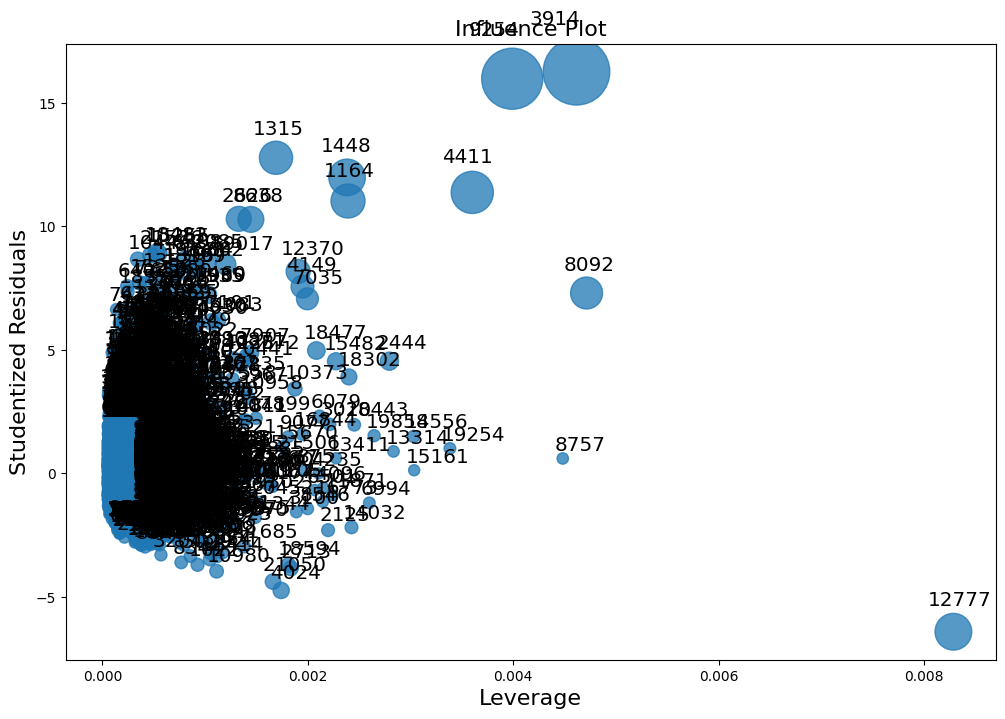

In [737]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [738]:
res

,y_hat,price,error,sq_error
0,277746.303147,221900.0,55846.303147,3.118810e+09
1,716371.985462,538000.0,178371.985462,3.181657e+10
2,206309.041619,180000.0,26309.041619,6.921657e+08
3,465077.659686,604000.0,-138922.340314,1.929942e+10
4,434359.945054,510000.0,-75640.054946,5.721418e+09
...,...,...,...,...
21608,393855.368107,360000.0,33855.368107,1.146186e+09
21609,577946.966834,400000.0,177946.966834,3.166512e+10
21610,287855.620385,402101.0,-114245.379615,1.305201e+10
21611,412541.520162,400000.0,12541.520162,1.572897e+08


In [741]:
#dummies_season = pd.get_dummies(df_2.season, dtype=int)

df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10])

In [745]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21611 non-null  int64  
 1   date           21611 non-null  object 
 2   price          21611 non-null  float64
 3   bedrooms       21611 non-null  int64  
 4   bathrooms      21611 non-null  float64
 5   sqft_living    21611 non-null  int64  
 6   sqft_lot       21611 non-null  int64  
 7   floors         21611 non-null  float64
 8   waterfront     21611 non-null  int64  
 9   view           21611 non-null  int64  
 10  condition      21611 non-null  int64  
 11  grade          21611 non-null  int64  
 12  sqft_above     21611 non-null  int64  
 13  sqft_basement  21611 non-null  int64  
 14  yr_built       21611 non-null  int64  
 15  yr_renovated   21611 non-null  int64  
 16  zipcode        21611 non-null  int64  
 17  lat            21611 non-null  float64
 18  long       

In [747]:
df_2['date'] = pd.to_datetime(df_2['date'])

In [748]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21611 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21611 non-null  int64         
 1   date           21611 non-null  datetime64[ns]
 2   price          21611 non-null  float64       
 3   bedrooms       21611 non-null  int64         
 4   bathrooms      21611 non-null  float64       
 5   sqft_living    21611 non-null  int64         
 6   sqft_lot       21611 non-null  int64         
 7   floors         21611 non-null  float64       
 8   waterfront     21611 non-null  int64         
 9   view           21611 non-null  int64         
 10  condition      21611 non-null  int64         
 11  grade          21611 non-null  int64         
 12  sqft_above     21611 non-null  int64         
 13  sqft_basement  21611 non-null  int64         
 14  yr_built       21611 non-null  int64         
 15  yr_renovated   21611 non

In [ ]:
daily_dataset = df_2.set_index('date').resample("D").agg({'bedrooms':'mean','floor':'mean','temp':'mean','casual':'sum','registered':'sum'})